### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 

**Food for thought:** And what if you had $N$ doors to choose from and the presenter opens $p\leq N$ of them? Study how the probability of winning changes as a function of $p$ and $N$.


In [9]:
import random
import matplotlib.pyplot as plt

def monty_hall_simulation(num_trials, switch):
    wins = 0
    
    for _ in range(num_trials):
        # 1: Randomly place the car behind one of the three doors
        car_position = random.randint(0, 2)
        
        # 2: Contestant makes an initial choice
        contestant_choice = random.randint(0, 2)
        
        # 3: Host opens one of the remaining doors that does not have the car
        remaining_doors = [door for door in range(3) if door != contestant_choice and door != car_position]
        host_opens = random.choice(remaining_doors)
        
        # 4: Contestant decides whether to switch or stay
        if switch:
            # Switch to the remaining unopened door.
            # The next() function in Python is used to get the next item from an iterator. 
            # Of the remaining ones (there is only one, because two are already "taken"), next() returns the first (and only) value generated.
            contestant_choice = next(door for door in range(3) if door != contestant_choice and door != host_opens)
        
        # 5: Check if the contestant's final choice is the car
        if contestant_choice == car_position:
            wins += 1
    
    return wins / num_trials

# Parameters
num_trials = 10000
switch = False  # Change to False to simulate the strategy of not switching

# Run simulation
win_rate_with_switch = monty_hall_simulation(num_trials, True)
print(f"Win rate when switching: {win_rate_with_switch:.2%}")

win_rate_without_switch = monty_hall_simulation(num_trials, False)
print(f"Win rate when not switching: {win_rate_without_switch:.2%}")


Win rate when switching: 65.63%
Win rate when not switching: 32.96%


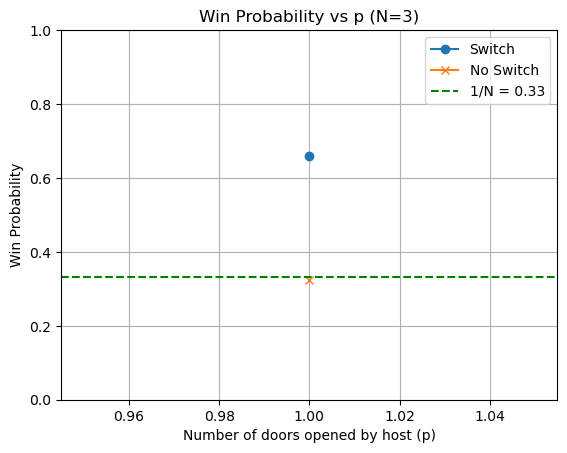

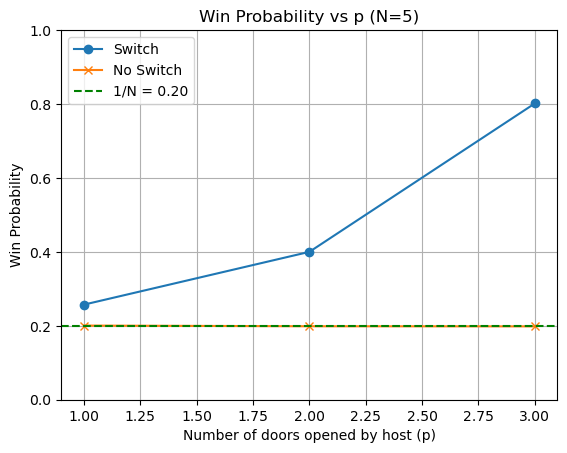

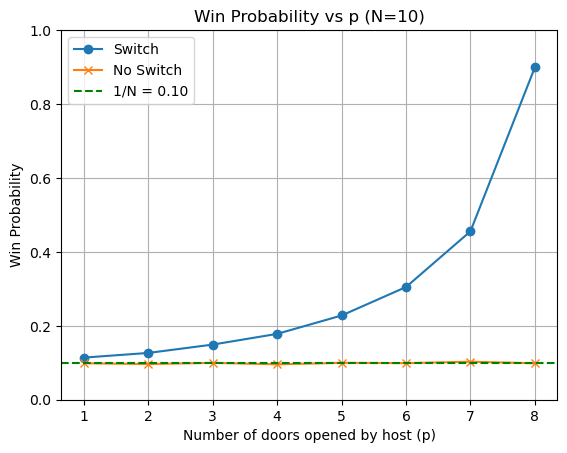

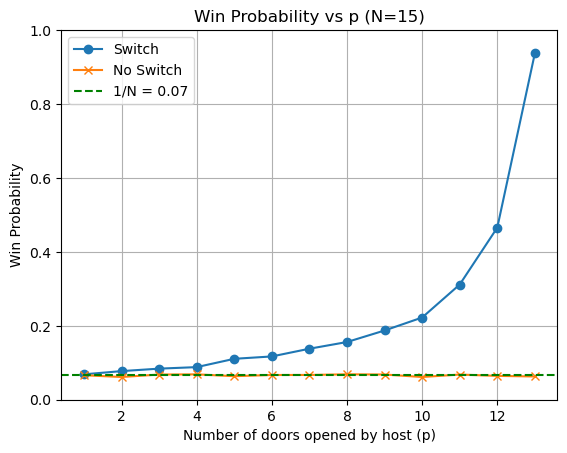

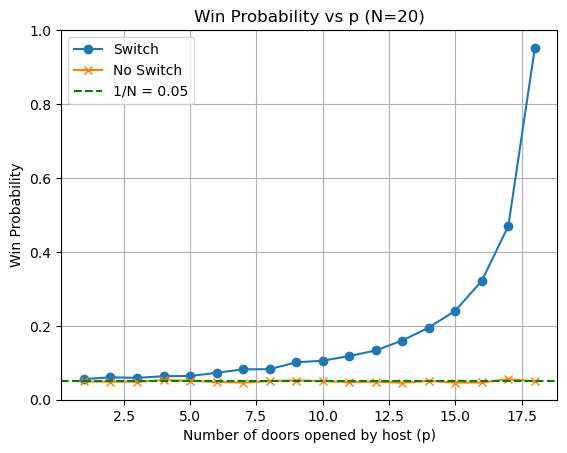

In [11]:
def generalized_monty_hall_simulation(num_trials, N, p, switch):
    wins = 0
    
    for _ in range(num_trials):
        # 1: Randomly place the car behind one of the N doors
        car_position = random.randint(0, N - 1)
        
        # 2: Contestant makes an initial choice
        contestant_choice = random.randint(0, N - 1)
        
        # 3: Host opens p doors that do not have the car or the contestant's choice
        remaining_doors = [door for door in range(N) if door != contestant_choice and door != car_position]
        host_opens = random.sample(remaining_doors, p)
        
        # 4: Contestant decides whether to switch or stay
        if switch:
            # Switch to one of the remaining unopened doors
            unopened_doors = [door for door in range(N) if door != contestant_choice and door not in host_opens]
            contestant_choice = random.choice(unopened_doors)
        
        # 5: Check if the contestant's final choice is the car
        if contestant_choice == car_position:
            wins += 1
    
    return wins / num_trials




# Values of N to test
N_values = [3, 5, 10, 15, 20]

# Plot probabilities for each N
for N in N_values:
    p_values = list(range(1, N-1))  # p ranges from 1 to N-1
    win_rates_switch = []
    win_rates_no_switch = []
    
    for p in p_values:
        win_rate_switch = generalized_monty_hall_simulation(num_trials, N, p, True)
        win_rate_no_switch = generalized_monty_hall_simulation(num_trials, N, p, False)
        win_rates_switch.append(win_rate_switch)
        win_rates_no_switch.append(win_rate_no_switch)
    
    plt.figure()
    plt.plot(p_values, win_rates_switch, label="Switch", marker='o')
    plt.plot(p_values, win_rates_no_switch, label="No Switch", marker='x')
    plt.axhline(1/N, color='green', linestyle='--', label=f"1/N = {1/N:.2f}")
    plt.title(f"Win Probability vs p (N={N})")
    plt.xlabel("Number of doors opened by host (p)")
    plt.ylabel("Win Probability")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.show()

## [Optional exercise if you want to practice; not examinable] Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

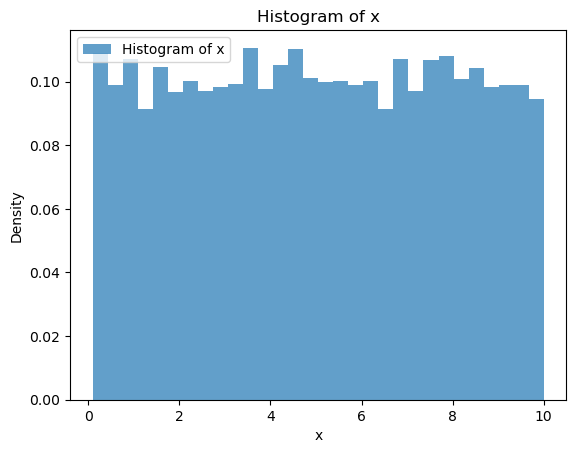

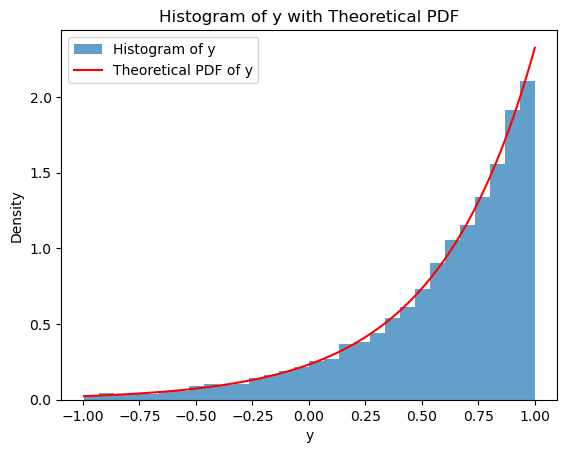

log(mean(x)): 0.7021511892293536
mean(y): 0.5832697789006072
log(median(x)): 0.6996731603111633
median(y): 0.6996731590915186


In [17]:
import numpy as np

# Step 1: Draw N random samples from a uniform distribution between 0.1 and 10
x = np.random.uniform(0.1, 10, 10000)

# Step 2: Make a histogram of these samples
plt.hist(x, bins=30, density=True, alpha=0.7, label="Histogram of x")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of x")
plt.legend()
plt.show()

# Step 3: Compute the base-10 log of x and store it as y
y = np.log10(x)

# Step 4: Make another histogram for y
plt.hist(y, bins=30, density=True, alpha=0.7, label="Histogram of y")

# Theoretical PDF of y
y_values = np.linspace(min(y), max(y), 1000)

# pdf_y = |dx/dy| * pdf_x
#pdf(x) = 1/(10-0.1)
#|dx/dy| = 10^y * log(10)
pdf_y = (10**y_values * np.log(10)) / (10 - 0.1)
plt.plot(y_values, pdf_y, color="red", label="Theoretical PDF of y")

plt.xlabel("y")
plt.ylabel("Density")
plt.title("Histogram of y with Theoretical PDF")
plt.legend()
plt.show()

# Step 5: Compute the log of the mean and median
log_mean_x = np.log10(np.mean(x))
log_mean_y = np.mean(y)
log_median_x = np.log10(np.median(x))
log_median_y = np.median(y)

print(f"log(mean(x)): {log_mean_x}")
print(f"mean(y): {log_mean_y}")
print(f"log(median(x)): {log_median_x}")
print(f"median(y): {log_median_y}")
